In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement_tb = base.classes.measurement
station_tb = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [131]:
recent_date = session.query(measurement_tb.date).order_by(measurement_tb.date.desc()).first()
recent_date

('2017-08-23',)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

<function matplotlib.pyplot.show(close=None, block=None)>

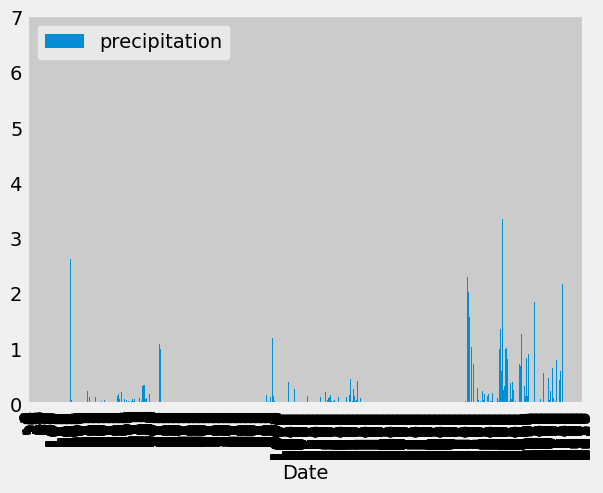

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement_tb.date, measurement_tb.prcp).filter(measurement_tb.date >= last_year).all()
print(prcp_data)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
df.set_index('date')
df.plot.bar(rot = 90,xlabel = "Date")

plt.show

# Sort the dataframe by date


# Use Pandas Plotting with , Matplotlib to plot the data
# pd.DataFrame(prcp_data).set_index("Date").hist(patch_artist=True)
# plt.title("IBM PTPs")
# plt.show()

# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(station_tb).distinct().count()
print(stations_count)

9


In [87]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
for row in session.query(measurement_tb.station, func.count(measurement_tb.station)).\
    group_by(measurement_tb.station).order_by(func.count(measurement_tb.station)).all():
    print(row)

('USC00518838', 511)
('USC00517948', 1372)
('USC00511918', 1979)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00519523', 2669)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519281', 2772)


In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
for row in session.query(func.min(measurement_tb.tobs), func.max(measurement_tb.tobs),\
    func.avg(measurement_tb.tobs)).filter(measurement_tb.station == 'USC00519281'):
    print(row)

(54.0, 85.0, 71.66378066378067)


Text(0.5, 0, 'Temperature')

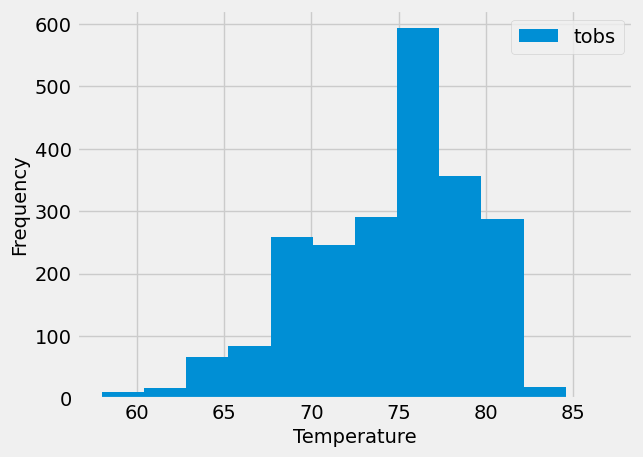

In [136]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement_tb.date, measurement_tb.tobs).filter(measurement_tb.date >= last_year).all()
#print(tobs_data)
df2 = pd.DataFrame(tobs_data)
df2.plot.hist(bins=12)
plt.xlabel("Temperature")

# Close Session

In [16]:
# Close Session
session.close()